In [8]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from scipy.stats import norm
from dateutil.parser import parse

In [9]:
fileData = open('CitibikeTripsWeather_10000000.csv','r')

day1dic = collections.defaultdict(int)
day2dic = collections.defaultdict(int)
#days = collections.defaultdict(list)


In [10]:
bucket = 1
day1 = '2014-04-30'
day2 = '2014-05-07'
data = fileData.readline()
#data = data.split(',')
#print data[10]
lines = fileData.readlines()
for val in lines:
    val = val.split(',')
    #print val
    date = val[1]
    dateCopy = date.split(' ')
    eachDate = dateCopy[0]
    if eachDate == day1:
        parsedDate = parse(date)
        day1dic[parsedDate.hour] += 1
        
    if eachDate == day2:
        parsedDate = parse(date)
        day2dic[parsedDate.hour] += 1
            
print day1dic
print day2dic

defaultdict(<type 'int'>, {0: 109, 1: 46, 2: 5, 3: 5, 4: 8, 5: 45, 6: 164, 7: 237, 8: 476, 9: 368, 10: 138, 11: 88, 12: 94, 13: 76, 14: 97, 15: 133, 16: 129, 17: 167, 18: 168, 19: 108, 20: 64, 21: 44, 22: 24, 23: 25})
defaultdict(<type 'int'>, {0: 200, 1: 97, 2: 38, 3: 22, 4: 48, 5: 155, 6: 846, 7: 1727, 8: 3185, 9: 2225, 10: 1150, 11: 1057, 12: 1352, 13: 1454, 14: 1350, 15: 1398, 16: 1954, 17: 3289, 18: 3299, 19: 2110, 20: 1296, 21: 900, 22: 735, 23: 402})


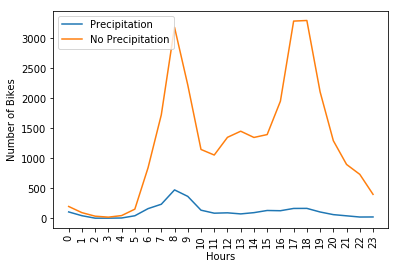

In [11]:
plt.plot(day1dic.values(), label = 'Precipitation')
plt.plot(day2dic.values(), label = 'No Precipitation')
plt.xticks([i for i in range(24)], rotation='vertical')

plt.ylabel('Number of Bikes')
plt.xlabel('Hours')
plt.legend(loc = 'upper left')
plt.show()
#plt.savefig('Weather.png')

In [12]:
day1_mean = np.mean(day1dic.values())
day2_mean = np.mean(day2dic.values())
theta_hat = day1_mean-day2_mean
t_obs=np.abs(theta_hat)

day1_std = np.std(day1dic.values())
day2_std = np.std(day2dic.values())
se_hat = np.sqrt(day1_std**2/len(day1dic.values()) + day2_std**2/len(day2dic.values()) )
W = t_obs/se_hat

p=1-norm.cdf(W)

print(t_obs)

1144.625


In [13]:
def permute(samples, t_obs):
    N=100000
    count=0
    for i in range(N):
        perm=np.random.permutation(samples)
        diff = np.mean(perm[:10])-np.mean(perm[10:])
        if diff>t_obs:
            count+=1
    
    return count/float(N)

In [14]:
p_v = permute(day1dic.values()+day2dic.values(), t_obs)
print("p value :",p_v)

('p value :', 0.00079)
